Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2  | AY 2023-2024
<hr> | <hr>
<u>**FINAL EXAM** | **Model Deployment in the Cloud**
**Name** | Paul Gabriel Pagatpat & Katherine May Dalangan
**Section** | CPE32S5
**Date Performed**: | May 11, 2024
**Date Submitted**: | May 18, 2024
**Instructor**: | Engr. Roman M. Richard

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Activation, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras import models, regularizers, optimizers
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras import layers, models
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, Adamax
from keras.models import model_from_json
from PIL import Image
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import VGG16
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint
from keras.applications import DenseNet121
from keras.applications.densenet import DenseNet121, preprocess_input

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_dir = '/content/drive/MyDrive/CPE019-FinalProject/images'
data_paths = []
labels = []

main_dirs = os.listdir(dataset_dir)
for folder_name in main_dirs:
    folder_path = os.path.join(dataset_dir, folder_name)
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        data_paths.append(file_path)
        labels.append(folder_name)

In [5]:
batch_size = 16
image_size = (150, 150)
num_channels = 3
image_shape = (image_size[0], image_size[1], num_channels)

data_dirs = pd.Series(data_paths, name='data_dir')
classes = pd.Series(labels, name='class')
dataframe = pd.concat([data_dirs, classes], axis=1)

def preprocess_image(img):
    return img

In [6]:
train_df, val_test_df = train_test_split(dataframe, train_size=0.8, shuffle=True, random_state=123)
val_df, test_df = train_test_split(val_test_df, train_size=0.5, shuffle=True, random_state=123)

datagen = ImageDataGenerator(preprocessing_function=preprocess_image, rescale=1.0/255)
train_generator = datagen.flow_from_dataframe(train_df, x_col='data_dir', y_col='class',
                                              target_size=image_size, class_mode='categorical',
                                              color_mode='rgb', shuffle=True, batch_size=batch_size)
valid_generator = datagen.flow_from_dataframe(val_df, x_col='data_dir', y_col='class',
                                              target_size=image_size, class_mode='categorical',
                                              color_mode='rgb', shuffle=True, batch_size=batch_size)
test_generator = datagen.flow_from_dataframe(test_df, x_col='data_dir', y_col='class',
                                             target_size=image_size, class_mode='categorical',
                                             color_mode='rgb', shuffle=True, batch_size=batch_size)

Found 900 validated image filenames belonging to 4 classes.
Found 112 validated image filenames belonging to 4 classes.
Found 113 validated image filenames belonging to 4 classes.


In [7]:
class_indices = train_generator.class_indices
print(class_indices)

step_size_train = train_generator.n // train_generator.batch_size
step_size_valid = valid_generator.n // valid_generator.batch_size

print(dataframe)

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}
                                               data_dir    class
0     /content/drive/MyDrive/CPE019-FinalProject/ima...  sunrise
1     /content/drive/MyDrive/CPE019-FinalProject/ima...  sunrise
2     /content/drive/MyDrive/CPE019-FinalProject/ima...  sunrise
3     /content/drive/MyDrive/CPE019-FinalProject/ima...  sunrise
4     /content/drive/MyDrive/CPE019-FinalProject/ima...  sunrise
...                                                 ...      ...
1120  /content/drive/MyDrive/CPE019-FinalProject/ima...    shine
1121  /content/drive/MyDrive/CPE019-FinalProject/ima...    shine
1122  /content/drive/MyDrive/CPE019-FinalProject/ima...    shine
1123  /content/drive/MyDrive/CPE019-FinalProject/ima...    shine
1124  /content/drive/MyDrive/CPE019-FinalProject/ima...    shine

[1125 rows x 2 columns]


In [8]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3) ,
    classes=4
)

29084464/29084464 [==============================] - 0s 0us/step


In [14]:

for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [15]:
checkpoint_path = "/content/drive/MyDrive/CPE019-FinalProject/bestmodel.hdf5.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[checkpoint]
)


Epoch 1/10
56/56 [==============================] - ETA: 0s - loss: 0.6139 - accuracy: 0.8111
Epoch 1: val_accuracy improved from -inf to 0.92857, saving model to /content/drive/MyDrive/CPE019-FinalProject/bestmodel.hdf5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 [==============================] - 185s 3s/step - loss: 0.6139 - accuracy: 0.8111 - val_loss: 0.1624 - val_accuracy: 0.9286
Epoch 2/10
56/56 [==============================] - ETA: 0s - loss: 0.2429 - accuracy: 0.9197
Epoch 2: val_accuracy did not improve from 0.92857
56/56 [==============================] - 95s 2s/step - loss: 0.2429 - accuracy: 0.9197 - val_loss: 0.1444 - val_accuracy: 0.9286
Epoch 3/10
56/56 [==============================] - ETA: 0s - loss: 0.2384 - accuracy: 0.9299
Epoch 3: val_accuracy did not improve from 0.92857
56/56 [==============================] - 99s 2s/step - loss: 0.2384 - accuracy: 0.9299 - val_loss: 0.5237 - val_accuracy: 0.8482
Epoch 4/10
56/56 [==============================] - ETA: 0s - loss: 0.1925 - accuracy: 0.9389
Epoch 4: val_accuracy improved from 0.92857 to 0.95536, saving model to /content/drive/MyDrive/CPE019-FinalProject/bestmodel.hdf5.h5
56/56 [==============================] - 100s 2s/step - loss: 0.1925 - accuracy: 0.9389 - val_l

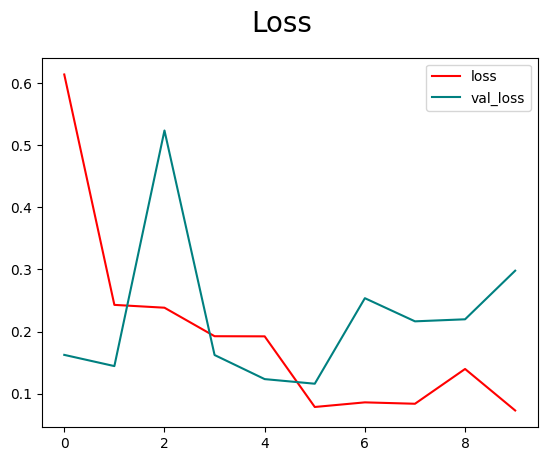

In [24]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='teal', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

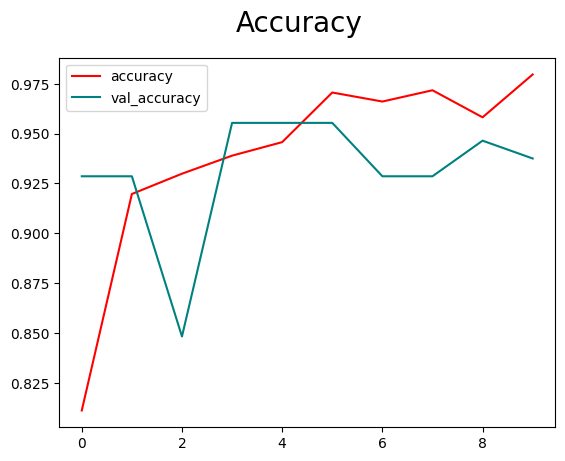

In [26]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='red', label='accuracy')
plt.plot(history.history['val_accuracy'], color='teal', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

# **Streamlit Deployment**

In [27]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


In [64]:
!pip install streamlit pyngrok

In [55]:
%%writefile /content/drive/MyDrive/CPE019-FinalProject/weather.py

Overwriting /content/drive/MyDrive/CPE019-FinalProject/weather.py


In [56]:
import streamlit as st
import requests
import h5py
import tensorflow as tf
from io import BytesIO
from PIL import Image

In [57]:
class_mapping = {
    0: 'cloudy',
    1: 'rain',
    2: 'shine',
    3: 'sunrise',
}

@st.cache(allow_output_mutation=True)
def load_model():
    base_url = "https://github.com/kdalangan/EmTech2-FinalProject/raw/main/"
    model_parts = [f"{base_url}bestmodel.hdf5.h5.part{i:02d}" for i in range(1, 35)]

    model_bytes = b''
    for part_url in model_parts:
        response = requests.get(part_url)
        model_bytes += response.content

    with h5py.File(BytesIO(model_bytes), 'r') as hf:
        model = tf.keras.models.load_model(hf)

    return model

In [58]:
def predict(image, model):
    img_array = np.array(image)
    img_array = tf.image.resize(img_array, (150, 150))
    img_array = tf.expand_dims(img_array, 0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class = class_mapping[np.argmax(predictions[0])]
    return predicted_class



In [59]:
st.title('Weather Classification')
uploaded_file = st.file_uploader("Choose a weather image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    model = load_model()

    predicted_class = predict(image, model)
    st.write(f"Prediction: {predicted_class}")

In [65]:
!streamlit run /content/drive/MyDrive/CPE019-FinalProject/weather.py &>/dev/null&

In [66]:
!ngrok authtoken 2gVcPyxhlPECE0Vto00bjnpGuUe_4FJwMZGomyPTrLBiLVeuG

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [67]:
from pyngrok import ngrok

public_url = ngrok.connect(addr='8501')
print(f"Streamlit URL: {public_url}")

!streamlit run /content/drive/MyDrive/CPE019-FinalProject/weather.py &>/dev/null&


Streamlit URL: NgrokTunnel: "https://abc7-34-139-42-139.ngrok-free.app" -> "http://localhost:8501"
